# Processing TikTok Post Data

In [133]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install gensim

In [134]:
# ! pip3 install wordsegment
# import sys
# print(sys.executable)
# !/usr/local/bin/python3 -m pip install wordsegment 
# !/usr/local/bin/python3 -m pip install gensim

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from PIL import Image
import re
from wordsegment import load, segment
from gensim.models import Word2Vec
from sklearn.preprocessing import FunctionTransformer

In [13]:
# df = pd.read_csv('users_vids_short.csv')
# df = pd.read_csv('sug_users_vids1.csv')
df = pd.read_csv('sug_users_vids_all.csv')

In [14]:
df.head()

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,6892428462015958273,1604768557,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,1604619960,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,1604497592,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,6891050048403049730,1604447622,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,6890886086613126402,1604409445,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211


#### Remove Unnecessary Data 

In [15]:
df.drop(['id', 'user_name', 'song', 'video_length', 'n_total_vids'], axis=1, inplace=True)
df.head()

,create_time,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",8,1984,3,18,12800,1000000,4700000,211
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",6,7372,9,51,52800,1000000,4700000,211
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",5,4623,11,27,37700,1000000,4700000,211
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",6,7931,6,24,51200,1000000,4700000,211
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",15,3229,9,14,24700,1000000,4700000,211


### Processing Time

In [16]:
df['datetime'] = pd.to_datetime(df['create_time'], unit='s')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour
df.head()

,create_time,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,datetime,year,month,day,weekday,hour
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",8,1984,3,18,12800,1000000,4700000,211,2020-11-07 17:02:37,2020,11,7,5,17
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",6,7372,9,51,52800,1000000,4700000,211,2020-11-05 23:46:00,2020,11,5,3,23
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",5,4623,11,27,37700,1000000,4700000,211,2020-11-04 13:46:32,2020,11,4,2,13
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",6,7931,6,24,51200,1000000,4700000,211,2020-11-03 23:53:42,2020,11,3,1,23
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",15,3229,9,14,24700,1000000,4700000,211,2020-11-03 13:17:25,2020,11,3,1,13


##### Cyclical Encoding

In [17]:


# df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
# df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
# df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# df['weekday_sin'] = np.sin(2 * np.pi * df['weekday']/7)
# df['weekday_cos'] = np.cos(2 * np.pi * df['weekday']/7)

# df.head()

In [18]:
# from sklearn.preprocessing import FunctionTransformer

In [19]:
def cyclicSinEncoding(timePeriod):
    encoding = FunctionTransformer(lambda x: np.sin(x / timePeriod * 2 * np.pi))
    return encoding 

def cyclicCosEncoding(timePeriod):
    encoding = FunctionTransformer(lambda x: np.cos(x / timePeriod * 2 * np.pi))
    return encoding 

df['month_sin'] = cyclicSinEncoding(12).fit_transform(df["month"])
df['month_cos'] = cyclicCosEncoding(12).fit_transform(df["month"])

df['day_sin'] = cyclicSinEncoding(31).fit_transform(df['day'])
df['day_cos'] = cyclicCosEncoding(31).fit_transform(df['day'])

df['hour_sin'] = cyclicSinEncoding(24).fit_transform(df['hour'])
df['hour_cos'] = cyclicCosEncoding(24).fit_transform(df['hour'])

df['weekday_sin'] = cyclicSinEncoding(7).fit_transform(df['weekday'])
df['weekday_cos'] = cyclicCosEncoding(7).fit_transform(df['weekday'])


df.head()

,create_time,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,...,weekday,hour,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",8,1984,3,18,12800,1000000,4700000,211,...,5,17,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",6,7372,9,51,52800,1000000,4700000,211,...,3,23,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",5,4623,11,27,37700,1000000,4700000,211,...,2,13,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",6,7931,6,24,51200,1000000,4700000,211,...,1,23,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",15,3229,9,14,24700,1000000,4700000,211,...,1,13,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [20]:
df.to_csv('plotTime.csv', index=False)

##### Removing Unnecessary Time Data

In [21]:
df.drop(['weekday', 'hour', 'month', 'day', 'datetime', 'create_time'], axis=1, inplace=True)
df.head()

,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",8,1984,3,18,12800,1000000,4700000,211,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"['johncena', 'love', 'tiktok', 'halloween', 'q...",6,7372,9,51,52800,1000000,4700000,211,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"['johncena', 'love', 'fyp', 'foryoupage']",5,4623,11,27,37700,1000000,4700000,211,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",6,7931,6,24,51200,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"['johncena', 'foryoupage', 'fyp', 'viral']",15,3229,9,14,24700,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


### Processing Hashtags

#### Handle NaN Data

In [22]:
# Convert hashtags to string 

df['hashtags'] = df['hashtags'].apply(ast.literal_eval)
df['hashtags'] = df['hashtags'].apply(lambda x: x if x != [] else ["nohashtag"])

def processHashtags(hashtags):
    for i in range(len(hashtags)):
        if not hashtags[i].strip(): 
            hashtags[i] = 'nohashtag'
    return hashtags

df['hashtags'] = df['hashtags'].apply(processHashtags)

df.head()

,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,"[johncena, love, tiktok, fyp, foryoupage, vibes]",8,1984,3,18,12800,1000000,4700000,211,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",6,7372,9,51,52800,1000000,4700000,211,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, fyp, foryoupage]",5,4623,11,27,37700,1000000,4700000,211,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, fyp, foryoupage, viral, comedy, cha...",6,7931,6,24,51200,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, fyp, viral]",15,3229,9,14,24700,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [23]:
explodedDf = df['hashtags'].explode()

#### Remove Special Characters

In [24]:
def removeSpecialCharacters(hashtags):
    processedHashtag = [re.sub(r'[^a-zA-Z0-9]', '', hashtag) for hashtag in hashtags]
    processedHashtag = [hashtag.lower() for hashtag in processedHashtag]
    return processedHashtag

In [25]:
df['hashtags'] = df['hashtags'].apply(removeSpecialCharacters)
df.head()

,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,"[johncena, love, tiktok, fyp, foryoupage, vibes]",8,1984,3,18,12800,1000000,4700000,211,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",6,7372,9,51,52800,1000000,4700000,211,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, fyp, foryoupage]",5,4623,11,27,37700,1000000,4700000,211,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, fyp, foryoupage, viral, comedy, cha...",6,7931,6,24,51200,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, fyp, viral]",15,3229,9,14,24700,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [26]:
explodedDf.value_counts()

nohashtag     15994
fyp            7099
foryou         6425
foryoupage     3718
viral          1754
              ...  
yaariyaan         1
뱀파이어💙             1
beaches           1
scubajake         1
montain           1
Name: hashtags, Length: 16567, dtype: int64

#### Handling Similar Hashtags

In [27]:
def processSimilarHashtags(hashtags):
    similarHashtags = ['fypforyoupage', 'fyp', 'foryou', 'foru', 'foruyou', 'fouryou', 'foryourpage', 'foryouu', 'foryoupag', '4you', 'fypforyou', 'foryoupagee', 'fouryoupage', 'fypforyourpage', 'foreyou', 'foreyoupage', 'foryour', 'foyou', 'fouyoupage' 'foryourpag', '4youpage', 'fypforyoupa', 'foryoupqge', 'fouryoupag', 'foryoupge', 'foyoupage', 'foryouoage', 'foryoyoupage', 'foreyourpage', 'foryourpages', 'fy']
    
    for i in range(len(hashtags)):
        
        if hashtags[i] in similarHashtags:
            hashtags[i] = 'foryoupage'
        
        if not hashtags[i].strip():
            hashtags[i] = 'nohashtag'
    return hashtags

df['hashtags'] = df['hashtags'].apply(processSimilarHashtags)


In [28]:
explodedDf = df['hashtags'].explode()
counts = explodedDf.value_counts()
counts.to_csv('hashtag_counts.csv')
print(counts)

foryoupage    18781
nohashtag     18624
viral          1760
tiktok         1658
trending       1384
              ...  
xgamesmode        1
nessa             1
ripwomen          1
gurlspower        1
montain           1
Name: hashtags, Length: 14555, dtype: int64


In [29]:
df.to_csv('TikTokPosts.csv', index=False)

#### Split Words in Hashtag

In [30]:
def splitHashtagByWords(hashtags):
    wordsToIgnore = ['tiktok']
    splitHashtags = []
    for hashtag in hashtags:
        if hashtag in wordsToIgnore:
             splitHashtags.append([hashtag])
        else:    
            splitHashtags.append(segment(hashtag))
    return splitHashtags

load()
splitHashtags = df['hashtags'].apply(splitHashtagByWords)

processedHashtag = []
for hashtag in splitHashtags:
    for tag in hashtag:
        processedHashtag.append(tag)

df.head()

,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos
0,"[johncena, love, tiktok, foryoupage, foryoupag...",8,1984,3,18,12800,1000000,4700000,211,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",6,7372,9,51,52800,1000000,4700000,211,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, foryoupage, foryoupage]",5,4623,11,27,37700,1000000,4700000,211,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, foryoupage, foryoupage, viral, come...",6,7931,6,24,51200,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, foryoupage, viral]",15,3229,9,14,24700,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


#### Encode Hashtags using Word2Vec

In [31]:
model = Word2Vec(sentences=processedHashtag, vector_size=200, window=5, min_count=1, sg=1, workers=4)

model.save("hashtags_word2vec.model")

# If you need to encode a whole hashtag or sentence, average the vectors of the constituent words
def encodeHashtag(hashtag):
    
    if any(word in model.wv.key_to_index for word in hashtag):
        vector = sum(model.wv[word] for word in hashtag if word in model.wv) / len(hashtag)
        return vector
    else:
        # Return a zero vector if none of the words are in the vocabulary
        return np.zeros(model.vector_size)

def encodeHashtagArray(hashtags):
    vectors = []
    for hashtag in hashtags:
        vector = encodeHashtag(hashtag)
        vectors.append(vector)
    
    if vectors:
        return np.mean(vectors, axis=0)
    else: 
        return np.zeros(model.vector_size)
    
df['hashtag_vectors'] = df['hashtags'].apply(encodeHashtagArray)
df.head()

,hashtags,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,weekday_sin,weekday_cos,hashtag_vectors
0,"[johncena, love, tiktok, foryoupage, foryoupag...",8,1984,3,18,12800,1000000,4700000,211,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521,"[-0.16639979, -0.15253414, -0.02810512, -0.111..."
1,"[johncena, love, tiktok, halloween, queen, rob...",6,7372,9,51,52800,1000000,4700000,211,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969,"[-0.17598537, -0.15683456, -0.042297952, -0.12..."
2,"[johncena, love, foryoupage, foryoupage]",5,4623,11,27,37700,1000000,4700000,211,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521,"[-0.19463147, -0.10846376, -0.0007633772, -0.1..."
3,"[johncena, foryoupage, foryoupage, viral, come...",6,7931,6,24,51200,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490,"[-0.1864588, -0.14242034, -0.014914392, -0.059..."
4,"[johncena, foryoupage, foryoupage, viral]",15,3229,9,14,24700,1000000,4700000,211,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490,"[-0.19872403, -0.11092921, 0.0014128024, -0.12..."


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41702 entries, 0 to 41701
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashtags         41702 non-null  object 
 1   video_length     41702 non-null  int64  
 2   n_likes          41702 non-null  int64  
 3   n_shares         41702 non-null  int64  
 4   n_comments       41702 non-null  int64  
 5   n_plays          41702 non-null  int64  
 6   n_followers      41702 non-null  int64  
 7   n_total_likes    41702 non-null  int64  
 8   n_total_vids     41702 non-null  int64  
 9   year             41702 non-null  int64  
 10  month_sin        41702 non-null  float64
 11  month_cos        41702 non-null  float64
 12  day_sin          41702 non-null  float64
 13  day_cos          41702 non-null  float64
 14  hour_sin         41702 non-null  float64
 15  hour_cos         41702 non-null  float64
 16  weekday_sin      41702 non-null  float64
 17  weekday_cos 

### Processing Outliers

### Data Scaling

In [62]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# sns.set_theme(palette="rainbow", style="darkgrid")

In [87]:
def calculateStatMeasures(col):
    print(f'{col}: mean={df[col].mean()}, median={df[col].median()}, mode={df[col].mode()}, std={df[col].std()}')

def plotData(xLabel, yLabel, x, y, title):
    plt.scatter(x, y, s=3)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

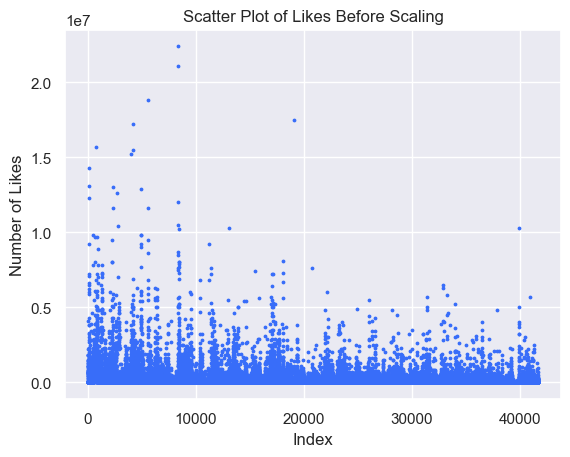

n_likes: mean=241869.3691189871, median=46100.0, mode=0    1100000
dtype: int64, std=685308.7832132428
likes_log: mean=10.344355060791639, median=10.738589920723442, mode=0    13.910822
dtype: float64, std=2.5005743758773296


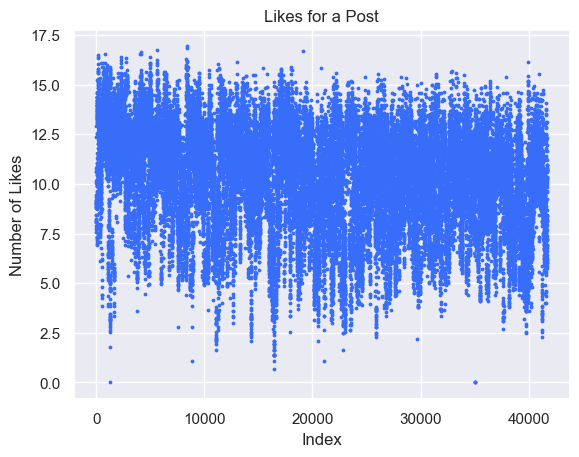

In [80]:
plt.scatter(df.index, df['n_likes'], s=3)
plt.title('Scatter Plot of Likes Before Scaling',)
plt.xlabel('Index')
plt.ylabel('Number of Likes')
plt.show()

df['likes_log'] = np.log1p(df['n_likes'])
df['shares_log'] = np.log1p(df['n_shares'])

calculateStatMeasures('n_likes')
calculateStatMeasures('likes_log')

plt.scatter(df.index, df['likes_log'], s=3)
plt.title('Likes for a Post')
plt.xlabel('Index')
plt.ylabel('Number of Likes')
plt.show()

In [ ]:
df['followers_log'] = np.log1p(df['n_followers'])

calculateStatMeasures('n_followers')
calculateStatMeasures('followers_log')

plt.scatter(df.index, df['n_followers'], s=3)
plt.title('Scatter Plot of Followers Before Scaling')
plt.xlabel('Index')
plt.ylabel('Number of Followers')
plt.show()

plt.scatter(df.index, df['followers_log'], s=3)
plt.title('Account Followers of Post')
plt.xlabel('Index')
plt.ylabel('Number of Followers')
plt.show()

n_comments: mean=2418.6812622895786, median=302.5, mode=0    0
dtype: int64, std=15422.076369760298


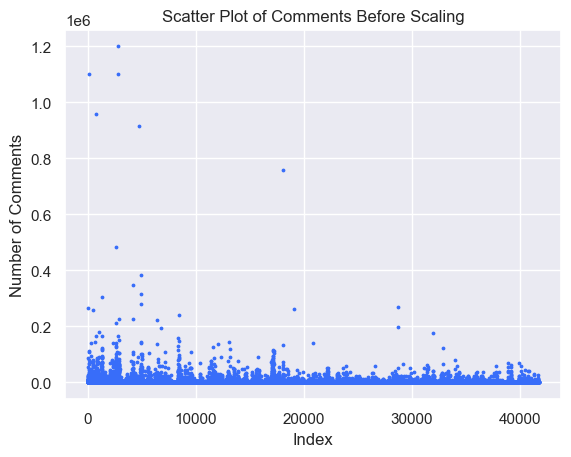

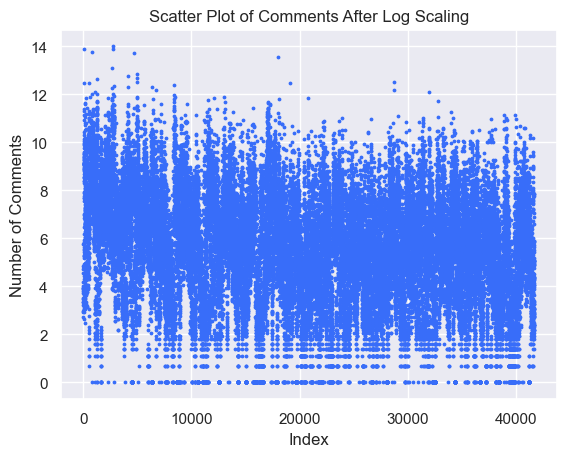

In [92]:
from sklearn.preprocessing import StandardScaler

calculateStatMeasures('n_comments')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['n_comments']])

df['scaled_comments'] = scaled_data
# df['comments_log'] = np.log1p(df['n_comments'])

# plotData('Index', 'Number of Comments', df.index, df['n_comments'], 'Scatter Plot of Comments Before Scaling')
# plotData('Index', 'Number of Comments',df.index, df['comments_log'],'Scatter Plot of Comments After Log Scaling')

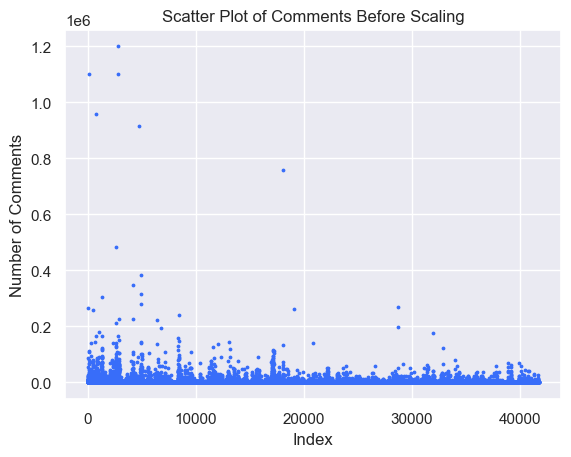

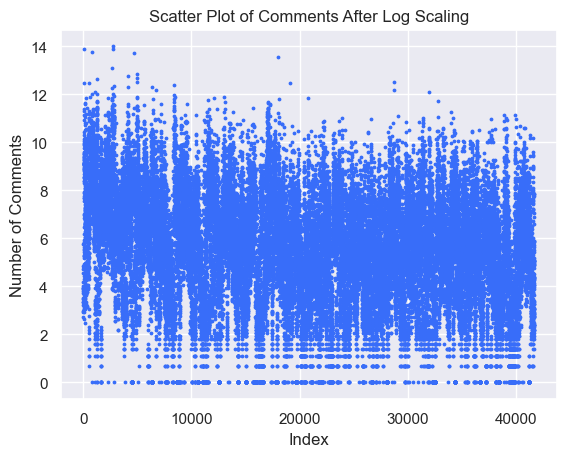

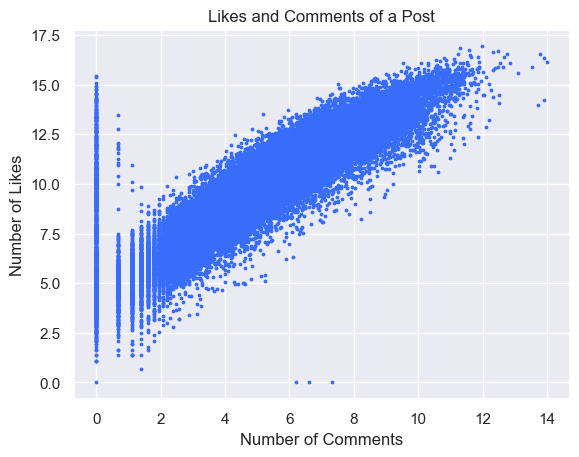

In [99]:
df['comments_log'] = np.log1p(df['n_comments'])

plotData('Index', 'Number of Comments', df.index, df['n_comments'], 'Scatter Plot of Comments Before Scaling')
plotData('Index', 'Number of Comments',df.index, df['comments_log'],'Scatter Plot of Comments After Log Scaling')

plotData('Number of Comments', 'Number of Likes', df['comments_log'], df['likes_log'], 'Likes and Comments of a Post')


n_plays: mean=1702947.471488178, median=326950.0, mode=0    1100000
dtype: int64, std=6436514.626008332
n_plays_log: mean=12.3259211493001, median=12.697565579862887, mode=0    13.910822
dtype: float64, std=2.427284091624411


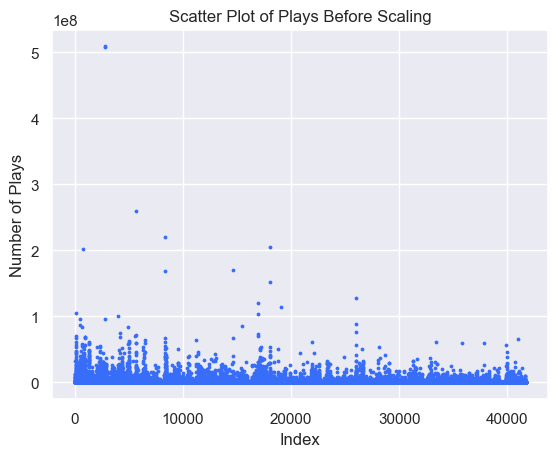

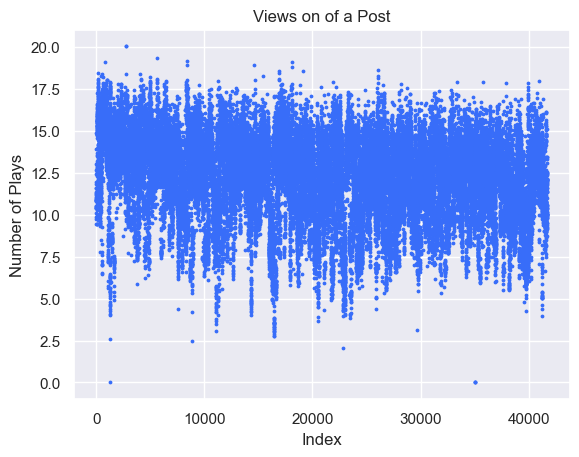

n_shares: mean=2223.7590283439645, median=146.0, mode=0    0
dtype: int64, std=13281.192558419061
shares_log: mean=4.955473707656837, median=4.990432586778736, mode=0    0.0
dtype: float64, std=2.449229958777594


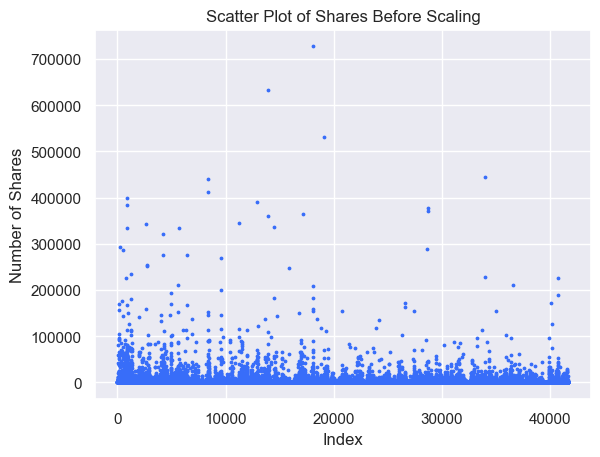

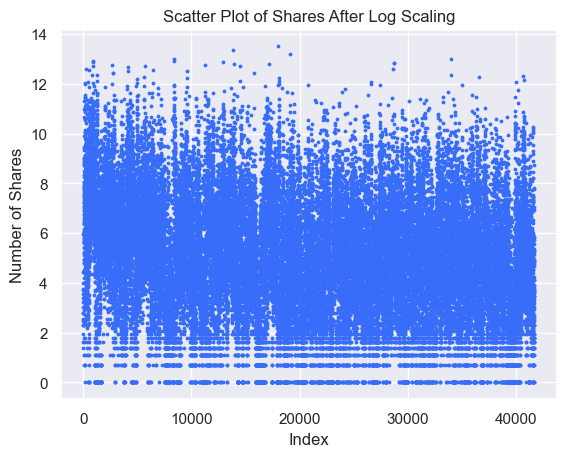

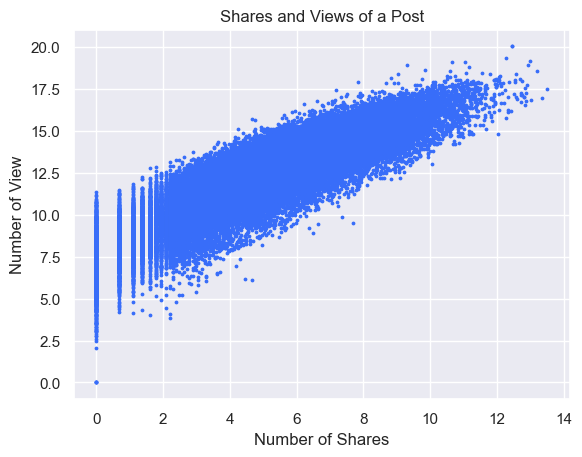

In [98]:
df['n_plays_log'] = np.log1p(df['n_plays'])

calculateStatMeasures('n_plays')
calculateStatMeasures('n_plays_log')

plotData('Index', 'Number of Plays', df.index, df['n_plays'], 'Scatter Plot of Plays Before Scaling')
plotData('Index', 'Number of Plays', df.index, df['n_plays_log'], 'Views on of a Post')

df['shares_log'] = np.log1p(df['n_shares'])

calculateStatMeasures('n_shares')
calculateStatMeasures('shares_log')

plotData('Index', 'Number of Shares', df.index, df['n_shares'], 'Scatter Plot of Shares Before Scaling')
plotData('Index', 'Number of Shares', df.index, df['shares_log'], 'Scatter Plot of Shares After Log Scaling')
plotData('Number of Shares', 'Number of View', df['shares_log'], df['n_plays_log'], 'Shares and Views of a Post')


n_total_likes: mean=115376893.07647115, median=29800000.0, mode=0    1200000
dtype: int64, std=255449188.8493202
n_total_likes_log: mean=16.681920883398256, median=17.21001898503268, mode=0    13.997833
dtype: float64, std=2.5212904078000586
n_followers: mean=4238835.779267182, median=2200000.0, mode=0    1300000
dtype: int64, std=6150926.852314888
followers_log: mean=14.103657557402425, median=14.603968372873895, mode=0    14.077876
dtype: float64, std=2.0219546464476115


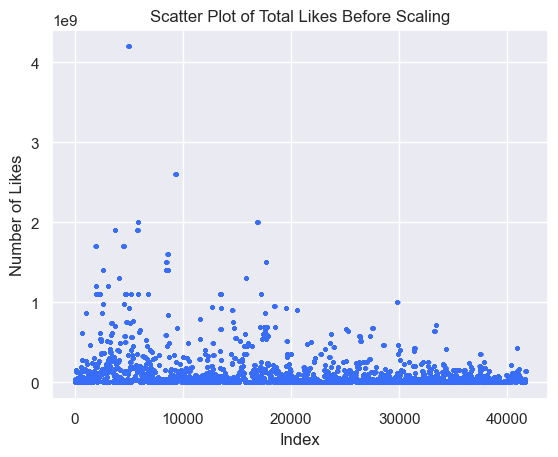

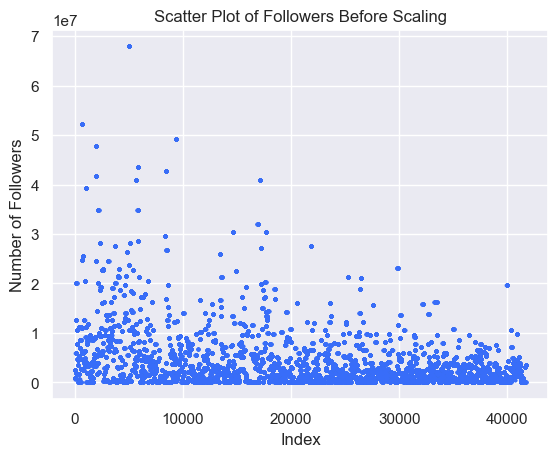

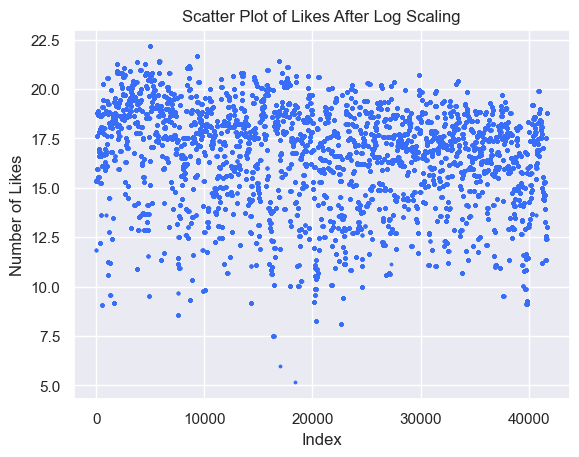

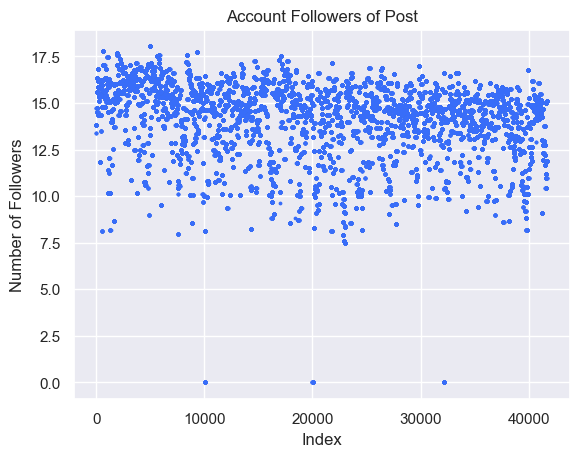

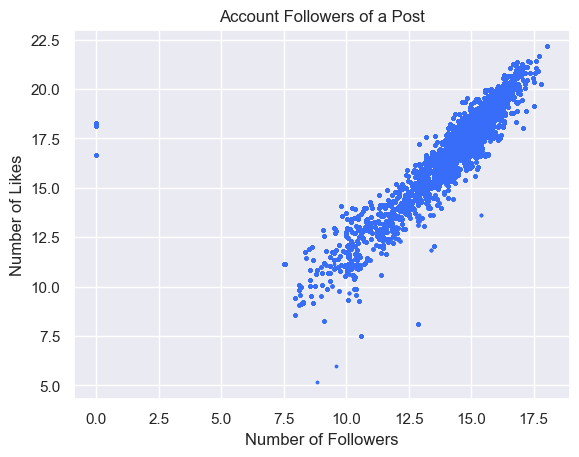

In [100]:
df['n_total_likes_log'] = np.log1p(df['n_total_likes'])
df['followers_log'] = np.log1p(df['n_followers'])

calculateStatMeasures('n_total_likes')
calculateStatMeasures('n_total_likes_log')

calculateStatMeasures('n_followers')
calculateStatMeasures('followers_log')


plotData('Index', 'Number of Likes', df.index, df['n_total_likes'], 'Scatter Plot of Total Likes Before Scaling')
plotData('Index', 'Number of Followers', df.index, df['n_followers'], 'Scatter Plot of Followers Before Scaling')

plotData('Index', 'Number of Likes', df.index, df['n_total_likes_log'], 'Scatter Plot of Likes After Log Scaling')
plotData('Index', 'Number of Followers', df.index, df['followers_log'], 'Account Followers of Post')

plotData('Number of Followers', 'Number of Likes', df['followers_log'], df['n_total_likes_log'], 'Account Followers of a Post')

### Calculating Statistical Measurements 

In [33]:
statColumns = ['video_length', 'n_likes', 'n_shares', 'n_comments', 'n_plays', 'n_followers', 'n_total_likes', 'year']

print('<data>: <mean>, <median>, <mode>')
# print(f'{"video_length"}: {df["video_length"].mean()}, {df["video_length"].median()}, {df["video_length"].mode()}')
for col in statColumns:
    if pd.api.types.is_numeric_dtype(df[col]):

        print(f'{col}: {df[col].mean()}, {df[col].median()}, {df[col].mode()}, std: {df[col].std()}')
    else:
        print(f'{col}: Not a numeric column')


<data>: <mean>, <median>, <mode>
video_length: 19.27965085607405, 15.0, 0    15
dtype: int64, std: 14.034629781889816
n_likes: 241869.3691189871, 46100.0, 0    1100000
dtype: int64, std: 685308.7832132428
n_shares: 2223.7590283439645, 146.0, 0    0
dtype: int64, std: 13281.192558419061
n_comments: 2418.6812622895786, 302.5, 0    0
dtype: int64, std: 15422.076369760298
n_plays: 1702947.471488178, 326950.0, 0    1100000
dtype: int64, std: 6436514.626008332
n_followers: 4238835.779267182, 2200000.0, 0    1300000
dtype: int64, std: 6150926.852314888
n_total_likes: 115376893.07647115, 29800000.0, 0    1200000
dtype: int64, std: 255449188.8493202
year: 2019.9841014819433, 2020.0, 0    2020
dtype: int64, std: 0.18829181830922986


### Store Preprocessed Data

In [34]:
df.to_csv('TikTokPosts.csv', index=False)